In [40]:
# Import Dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read Crime Data
crime_data = pd.read_csv("p_data.csv")

# Read CTA Data
cta_data = pd.read_csv("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")

# Rename CTA Columns
cta_data.columns = ["Date", "Day Type", "Bus", "Rail Boardings", "Total Rides"]

In [3]:
# Display CTA Data
cta_data

,Date,Day Type,Bus,Rail Boardings,Total Rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343
...,...,...,...,...,...
7056,02/25/2020,W,781725,693749,1475474
7057,02/26/2020,W,756936,682501,1439437
7058,02/27/2020,W,778992,698886,1477878
7059,02/28/2020,W,786008,665937,1451945


In [4]:
# Identify Incomplete Rows
cta_data.count()

Date              7061
Day Type          7061
Bus               7061
Rail Boardings    7061
Total Rides       7061
dtype: int64

In [5]:
# Delete Unwanted Columns
del crime_data["ID"]
del crime_data["Case Number"]
del crime_data["IUCR"]
del crime_data["Beat"]
del crime_data["District"]
del crime_data["Ward"]
del crime_data["Community Area"]
del crime_data["FBI Code"]
del crime_data["X Coordinate"]
del crime_data["Y Coordinate"]
del crime_data["Updated On"]

In [6]:
# Identify Incomplete Rows
crime_data.count()

Date                    110580
Block                   110580
Primary Type            110580
Description             110580
Location Description    110580
Arrest                  110580
Domestic                110580
Year                    110580
Latitude                109808
Longitude               109808
Location                109808
dtype: int64

In [7]:
# Drop All Rows With Missing Information
crime_data = crime_data.dropna(how='any')

In [8]:
# Verify Dropped Rows
crime_data.count()

Date                    109808
Block                   109808
Primary Type            109808
Description             109808
Location Description    109808
Arrest                  109808
Domestic                109808
Year                    109808
Latitude                109808
Longitude               109808
Location                109808
dtype: int64

In [9]:
# Display Crime Data
crime_data

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,04/07/2020,002XX S STATE ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
1,07/09/2017,000XX W 95TH ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2017,41.721627,-87.624485,"(41.721627204, -87.624485177)"
2,07/13/2019,001XX W CERMAK RD,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2019,41.852868,-87.630915,"(41.852868298, -87.63091491)"
3,03/29/2011,009XX W FULLERTON AVE,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2011,41.925398,-87.652311,"(41.925398449, -87.652311296)"
4,03/16/2013,003XX E 43RD ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2013,41.816599,-87.619114,"(41.816598679, -87.619113763)"
...,...,...,...,...,...,...,...,...,...,...,...
110575,03/11/2015,004XX S WESTERN AVE,THEFT,$500 AND UNDER,CTA TRAIN,False,True,2015,41.875073,-87.686256,"(41.875073359, -87.68625556)"
110576,03/16/2015,001XX W LAKE ST,THEFT,POCKET-PICKING,CTA TRAIN,True,False,2015,41.885741,-87.631712,"(41.885741029, -87.631711749)"
110577,03/16/2015,001XX W LAKE ST,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,CTA TRAIN,False,False,2015,41.885741,-87.631712,"(41.885741029, -87.631711749)"
110578,03/17/2015,100XX W OHARE ST,THEFT,PURSE-SNATCHING,CTA TRAIN,False,False,2015,41.976290,-87.905227,"(41.976290414, -87.905227221)"


In [10]:
# Merge CTA and Crime Data
data_complete = pd.merge(cta_data, crime_data, how="outer", on=["Date", "Date"])

# Convert to DataFrame
project_data = pd.DataFrame(data_complete)

# Display New DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,01/01/2001,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,01/01/2001,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,01/01/2001,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,01/01/2001,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,01/01/2001,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110929,04/10/2020,NaN,NaN,NaN,NaN,002XX S STATE ST,NARCOTICS,POSSESS - CRACK,CTA PLATFORM,True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
110930,04/10/2020,NaN,NaN,NaN,NaN,032XX W LAKE ST,BATTERY,SIMPLE,CTA STATION,False,False,2020,41.884389,-87.706866,"(41.884389103, -87.706866213)"
110931,04/10/2020,NaN,NaN,NaN,NaN,001XX W CERMAK RD,ASSAULT,SIMPLE,CTA TRAIN,True,False,2020,41.852868,-87.630915,"(41.852868298, -87.63091491)"
110932,04/10/2020,NaN,NaN,NaN,NaN,046XX W MONTROSE AVE,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2020,41.960778,-87.742731,"(41.960778173, -87.742731337)"


In [11]:
# Identify Incomplete Rows
project_data.count()

Date                    110934
Day Type                110500
Bus                     110500
Rail Boardings          110500
Total Rides             110500
Block                   110934
Primary Type            110934
Description             110934
Location Description    110934
Arrest                  110934
Domestic                110934
Year                    110934
Latitude                110934
Longitude               110934
Location                110934
dtype: int64

In [12]:
# Assign Date Column to a Variable
all_dates = project_data["Date"]

# Convert All Dates to a Datetime 
[dt.datetime.strptime(x, "%m/%d/%Y") for x in all_dates]

# Replace Date Column with Datetime Values
project_data["Date"] = pd.to_datetime(all_dates)

# Display Modified DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110929,2020-04-10,NaN,NaN,NaN,NaN,002XX S STATE ST,NARCOTICS,POSSESS - CRACK,CTA PLATFORM,True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
110930,2020-04-10,NaN,NaN,NaN,NaN,032XX W LAKE ST,BATTERY,SIMPLE,CTA STATION,False,False,2020,41.884389,-87.706866,"(41.884389103, -87.706866213)"
110931,2020-04-10,NaN,NaN,NaN,NaN,001XX W CERMAK RD,ASSAULT,SIMPLE,CTA TRAIN,True,False,2020,41.852868,-87.630915,"(41.852868298, -87.63091491)"
110932,2020-04-10,NaN,NaN,NaN,NaN,046XX W MONTROSE AVE,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2020,41.960778,-87.742731,"(41.960778173, -87.742731337)"


In [13]:
# Filter Out Data From After 2019
project_data = project_data[project_data["Date"].dt.year <= 2019]

# Display Modified DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109507,2019-12-31,W,511289.0,431677.0,942966.0,0000X E ROOSEVELT RD,BATTERY,SIMPLE,CTA STATION,False,False,2019,41.867428,-87.626269,"(41.867428235, -87.626269143)"
109508,2019-12-31,W,511289.0,431677.0,942966.0,011XX W GRANVILLE AVE,THEFT,OVER $500,CTA TRAIN,False,False,2019,41.994568,-87.659057,"(41.994567578, -87.65905678)"
109509,2019-12-31,W,511289.0,431677.0,942966.0,0000X N DEARBORN ST,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2019,41.882382,-87.629413,"(41.882381731, -87.629412971)"
109510,2019-12-31,W,511289.0,431677.0,942966.0,0000X N DEARBORN ST,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,CTA TRAIN,False,False,2019,41.882382,-87.629413,"(41.882381731, -87.629412971)"


In [14]:
# Verify Complete Rows
project_data.count()

Date                    109512
Day Type                109512
Bus                     109512
Rail Boardings          109512
Total Rides             109512
Block                   109512
Primary Type            109512
Description             109512
Location Description    109512
Arrest                  109512
Domestic                109512
Year                    109512
Latitude                109512
Longitude               109512
Location                109512
dtype: int64

In [15]:
project_data["Location Description"] = project_data["Location Description"].replace({'CTA "L" TRAIN': "CTA TRAIN"})

project_data["Location Description"] = project_data["Location Description"].replace({'CTA "L" PLATFORM': "CTA PLATFORM"})

project_data["Location Description"] = project_data["Location Description"].replace({"CTA SUBWAY STATION": "CTA STATION"})

# Investiigate Crime Count for Each Location Description
project_data["Location Description"].value_counts()

C:\Users\ASush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ASush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASush\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

CTA PLATFORM                   37639
CTA TRAIN                      26478
CTA BUS                        22801
CTA GARAGE / OTHER PROPERTY    10309
CTA BUS STOP                    6880
CTA STATION                     5251
CTA TRACKS - RIGHT OF WAY        150
CTA PROPERTY                       4
Name: Location Description, dtype: int64

In [16]:
# Get names of indexes for which column Age has value 30
garage_op = project_data[project_data["Location Description"] == "CTA GARAGE / OTHER PROPERTY" ].index
tracks = project_data[project_data["Location Description"] == "CTA TRACKS - RIGHT OF WAY" ].index
cta_prop = project_data[project_data["Location Description"] == "CTA PROPERTY" ].index
drop_bus = project_data[project_data["Location Description"] == "CTA BUS" ].index
drop_bus_stop = project_data[project_data["Location Description"] == "CTA BUS STOP" ].index

# Delete these row indexes from dataFrame
project_data.drop(garage_op, inplace=True)
project_data.drop(tracks, inplace=True)
project_data.drop(cta_prop, inplace=True)
project_data.drop(drop_bus, inplace=True)
project_data.drop(drop_bus_stop, inplace=True)

project_data["Location Description"].value_counts()

C:\Users\ASush\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CTA PLATFORM    37639
CTA TRAIN       26478
CTA STATION      5251
Name: Location Description, dtype: int64

In [17]:
# Sort CTA Data by L Ridership Total
highest_boarding = cta_data.sort_values("Rail Boardings", ascending=False)

# Isolate Only Date Column
highest_boarding = highest_boarding["Date"]

# Display Most Popular Days to Ride L
highest_boarding

5850    11/04/2016
5753    10/28/2016
5338    06/18/2015
2740    07/03/2008
4592    06/28/2013
           ...    
1088    12/25/2003
6665    01/30/2019
723     12/25/2002
358     12/25/2001
1454    12/25/2004
Name: Date, Length: 7061, dtype: object

In [18]:
# Sort CTA Data by L Ridership Total
lowest_boarding = cta_data.sort_values("Rail Boardings", ascending=True)

# Isolate Only Date Column
lowest_boarding = lowest_boarding["Date"]

# Display Least Popular Days to Ride L
lowest_boarding

1454    12/25/2004
358     12/25/2001
723     12/25/2002
6665    01/30/2019
1088    12/25/2003
           ...    
4592    06/28/2013
2740    07/03/2008
5338    06/18/2015
5753    10/28/2016
5850    11/04/2016
Name: Date, Length: 7061, dtype: object

In [21]:
# Assign All Location Description Column Values to a Variable
cta_platform = project_data[project_data["Location Description"] == "CTA PLATFORM"]
cta_train = project_data[project_data["Location Description"] == "CTA TRAIN"]
cta_station = project_data[project_data["Location Description"] == "CTA STATION"]

In [22]:
# Create a List to Hold Location Description Values
p_type = [cta_platform, cta_train, cta_station]

# Create a List to Hold Location Description Value Names
location_description  = ["CTA PLATFORM", "CTA TRAIN", "CTA STATION"]

# Create a For Loop to Display Primary Crime Type
for x in range(3):
    print(f"LOCATION DESCRIPTION: {location_description[x]}")
    print("PRIMARY CRIME TYPE:")
    print(p_type[x]["Primary Type"].value_counts())

LOCATION DESCRIPTION: CTA PLATFORM
PRIMARY CRIME TYPE:
DECEPTIVE PRACTICE                  12669
THEFT                                6056
NARCOTICS                            4550
BATTERY                              4001
CRIMINAL TRESPASS                    2689
CRIMINAL DAMAGE                      2506
ROBBERY                              2357
ASSAULT                              1458
PUBLIC PEACE VIOLATION                314
SEX OFFENSE                           245
WEAPONS VIOLATION                     221
OTHER OFFENSE                         188
LIQUOR LAW VIOLATION                  129
INTERFERENCE WITH PUBLIC OFFICER      106
CRIM SEXUAL ASSAULT                    26
GAMBLING                               23
BURGLARY                               22
PROSTITUTION                           19
OFFENSE INVOLVING CHILDREN             16
STALKING                               14
KIDNAPPING                              9
ARSON                                   5
HOMICIDE             

In [23]:
crime_data.head(25)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,04/07/2020,002XX S STATE ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
1,07/09/2017,000XX W 95TH ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2017,41.721627,-87.624485,"(41.721627204, -87.624485177)"
2,07/13/2019,001XX W CERMAK RD,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2019,41.852868,-87.630915,"(41.852868298, -87.63091491)"
3,03/29/2011,009XX W FULLERTON AVE,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2011,41.925398,-87.652311,"(41.925398449, -87.652311296)"
4,03/16/2013,003XX E 43RD ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2013,41.816599,-87.619114,"(41.816598679, -87.619113763)"
5,07/27/2008,011XX S STATE ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2008,41.868165,-87.627440,"(41.868165405, -87.62743954)"
6,05/22/2003,011XX W ARGYLE ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" TRAIN",True,False,2003,41.973263,-87.658436,"(41.973263481, -87.658435722)"
7,06/23/2016,002XX W 47TH ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" TRAIN",True,False,2016,41.809125,-87.631907,"(41.809125265, -87.631906508)"
8,04/09/2020,003XX N CICERO AVE,BATTERY,DOMESTIC BATTERY SIMPLE,CTA BUS,False,False,2020,41.885630,-87.745462,"(41.88563049, -87.745462151)"
9,04/09/2020,046XX S CICERO AVE,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,CTA BUS,True,False,2020,41.808450,-87.743168,"(41.808449979, -87.74316789)"


In [24]:
# Assign All Years to a Variable
year_2001 = project_data[project_data["Year"] == 2001]
year_2002 = project_data[project_data["Year"] == 2002]
year_2003 = project_data[project_data["Year"] == 2003]
year_2004 = project_data[project_data["Year"] == 2004]
year_2005 = project_data[project_data["Year"] == 2005]
year_2006 = project_data[project_data["Year"] == 2006]
year_2007 = project_data[project_data["Year"] == 2007]
year_2008 = project_data[project_data["Year"] == 2008]
year_2009 = project_data[project_data["Year"] == 2009]
year_2010 = project_data[project_data["Year"] == 2010]
year_2011 = project_data[project_data["Year"] == 2011]
year_2012 = project_data[project_data["Year"] == 2012]
year_2013 = project_data[project_data["Year"] == 2013]
year_2014 = project_data[project_data["Year"] == 2014]
year_2015 = project_data[project_data["Year"] == 2015]
year_2016 = project_data[project_data["Year"] == 2016]
year_2017 = project_data[project_data["Year"] == 2017]
year_2018 = project_data[project_data["Year"] == 2018]
year_2019 = project_data[project_data["Year"] == 2019]

In [ ]:
# Example DO NOT EDIT!
# Filter for a Single Month Example
january_2001 = year_2001[year_2001["Date"].dt.month == 1]

# Display Example
january_2001

In [ ]:
# Example DO NOT EDIT!
# Filter for a Single Day Example
january_01_2001 = january_2001[january_2001["Date"].dt.day == 1]

# Display Example
january_01_2001

In [ ]:
# Example DO NOT EDIT!
# Filter Homicide Data
homicide = project_data[project_data["Primary Type"] == "HOMICIDE"]

# Display Homicide Data
homicide

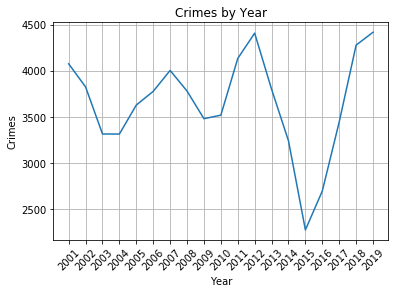

In [26]:
# Created list of project data by year
plot_year = [year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014, year_2015, year_2016, year_2017, year_2018, year_2019]

# Created empty list to append total crime count for that year
total_crime_year = []

# Created year list to plot 
year = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# For loop to add total crime count to list above
for x in range(19):
    total_crime_year.append(plot_year[x]["Primary Type"].count())

# Plotted year vs crime count 
plt.plot(year, total_crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crimes")
plt.xlabel("Year")
plt.title("Crimes by Year")
plt.grid()
plt.show()

In [28]:
# set ridership count for year to 0 
ridership_2001 = 0
ridership_2002 = 0
ridership_2003 = 0
ridership_2004 = 0
ridership_2005 = 0
ridership_2006 = 0
ridership_2007 = 0
ridership_2008 = 0
ridership_2009 = 0
ridership_2010 = 0
ridership_2011 = 0
ridership_2012 = 0
ridership_2013 = 0
ridership_2014 = 0
ridership_2015 = 0
ridership_2016 = 0
ridership_2017 = 0
ridership_2018 = 0
ridership_2019 = 0

#For loop to get total rider count for each year 
for x in range(cta_data["Rail Boardings"].count()):    
    if cta_data["Date"][x][6:10] == "2001":
        ridership_2001 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2002":
        ridership_2002 += cta_data["Rail Boardings"][x]    
    elif cta_data["Date"][x][6:10] == "2003":
        ridership_2003 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2004":
        ridership_2004 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2005":
        ridership_2005 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2006":
        ridership_2006 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2007":
        ridership_2007 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2008":
        ridership_2008 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2009":
        ridership_2009 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2010":
        ridership_2010 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2011":
        ridership_2011 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2012":
        ridership_2012 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2013":
        ridership_2013 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2014":
        ridership_2014 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2015":
        ridership_2015 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2016":
        ridership_2016 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2017":
        ridership_2017 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2018":
        ridership_2018 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2019":
        ridership_2019 += cta_data["Rail Boardings"][x]

# Print rider count for each year
print(f'Total ridership in 2001: {ridership_2001}')
print(f'Total ridership in 2002: {ridership_2002}')
print(f'Total ridership in 2003: {ridership_2003}')
print(f'Total ridership in 2004: {ridership_2004}')
print(f'Total ridership in 2005: {ridership_2005}')
print(f'Total ridership in 2006: {ridership_2006}')
print(f'Total ridership in 2007: {ridership_2007}')
print(f'Total ridership in 2008: {ridership_2008}')
print(f'Total ridership in 2009: {ridership_2009}')
print(f'Total ridership in 2010: {ridership_2010}')
print(f'Total ridership in 2011: {ridership_2011}')
print(f'Total ridership in 2012: {ridership_2012}')
print(f'Total ridership in 2013: {ridership_2013}')
print(f'Total ridership in 2014: {ridership_2014}')
print(f'Total ridership in 2015: {ridership_2015}')
print(f'Total ridership in 2016: {ridership_2016}')
print(f'Total ridership in 2017: {ridership_2017}')
print(f'Total ridership in 2018: {ridership_2018}')
print(f'Total ridership in 2019: {ridership_2019}')

Total ridership in 2001: 181692888
Total ridership in 2002: 180399629
Total ridership in 2003: 181135096
Total ridership in 2004: 178716468
Total ridership in 2005: 186759525
Total ridership in 2006: 195169313
Total ridership in 2007: 190273414
Total ridership in 2008: 198137253
Total ridership in 2009: 202569040
Total ridership in 2010: 210849074
Total ridership in 2011: 241866109
Total ridership in 2012: 231154339
Total ridership in 2013: 228684399
Total ridership in 2014: 258884389
Total ridership in 2015: 241676065
Total ridership in 2016: 238645812
Total ridership in 2017: 230204047
Total ridership in 2018: 225894953
Total ridership in 2019: 218467141


In [29]:
# Added ridership count for each year to list
ridership_count = [ridership_2001, ridership_2002, ridership_2003, ridership_2004, ridership_2005, ridership_2006, ridership_2007, ridership_2008, ridership_2009, ridership_2010, ridership_2011, ridership_2012, ridership_2013, ridership_2014, ridership_2015, ridership_2016, ridership_2017, ridership_2018, ridership_2019]

# Found total riders to ensure that rider aligns with rider count in cta_data (excluded 2020 year)
# Set ridership count to 0
total_ridership = 0
for x in range(19):
    total_ridership += ridership_count[x]

print(total_ridership)
cta_data["Rail Boardings"].sum()

4021178954


4054658876

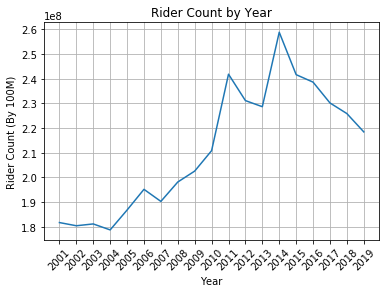

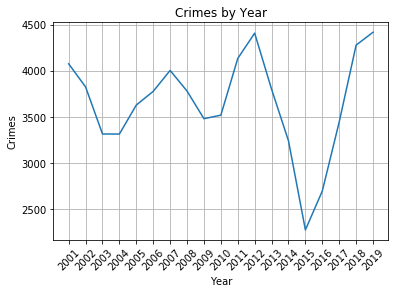

In [30]:
#Plot rider count vs year
plt.plot(year, ridership_count)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Rider Count (By 100M)")
plt.xlabel("Year")
plt.title("Rider Count by Year")
plt.grid()
plt.show()

#Plot crimes vs year
plt.plot(year, total_crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crimes")
plt.xlabel("Year")
plt.title("Crimes by Year")
plt.grid()
plt.show()


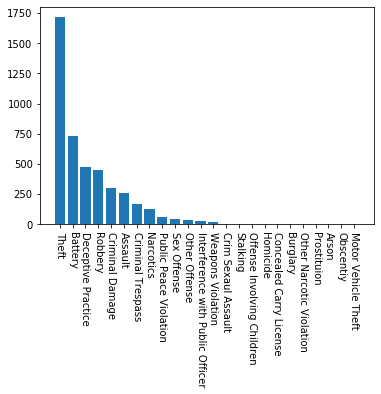

THEFT                                1715
BATTERY                               730
DECEPTIVE PRACTICE                    471
ROBBERY                               449
CRIMINAL DAMAGE                       303
ASSAULT                               257
CRIMINAL TRESPASS                     170
NARCOTICS                             125
PUBLIC PEACE VIOLATION                 57
SEX OFFENSE                            44
OTHER OFFENSE                          33
INTERFERENCE WITH PUBLIC OFFICER       26
WEAPONS VIOLATION                      18
CRIM SEXUAL ASSAULT                     5
STALKING                                3
OFFENSE INVOLVING CHILDREN              2
HOMICIDE                                2
CONCEALED CARRY LICENSE VIOLATION       1
BURGLARY                                1
OTHER NARCOTIC VIOLATION                1
PROSTITUTION                            1
ARSON                                   1
OBSCENITY                               1
MOTOR VEHICLE THEFT               

In [58]:
type_of_crime = year_2019["Primary Type"].value_counts()
len(year_2019["Primary Type"].value_counts())
x_axis = np.arange(len(type_of_crime))
plt.bar(x_axis, type_of_crime)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Theft", "Battery", "Deceptive Practice", "Robbery", "Criminal Damage", "Assault", "Criminal Trespass", "Narcotics", "Public Peace Violation", "Sex Offense", "Other Offense", "Interference with Public Officer", "Weapons Violation", "Crim Sexaul Assault", "Stalking", "Offense Involving Children", "Homicide", "Concealed Carry License", "Burglary", "Other Narcotic Violation", "Prostituion", "Arson", "Obscentiy", "Motor Vehicle Theft"], rotation = 270)
plt.show()
type_of_crime

In [ ]:
ridership_count[0]

In [ ]:
total_crime_year[0] / ridership_count[0]

In [ ]:
crime_year = []
for x in range(19):
    crime_year.append(total_crime_year[x] / ridership_count[x])
    print(f"Crime Rate in {year[x]}: {crime_year[x]}")
    
plt.plot(year, crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crime Rate (%)")
plt.xlabel("Year")
plt.title("Crime Rate by Year")
plt.grid()
plt.show()

In [ ]:
riders_per_crime = []
for x in range(19):
    riders_per_crime.append(ridership_count[x] / total_crime_year[x])
    print(f"Riders Per Crime in {year[x]}: {riders_per_crime[x]}")
    

plt.plot(year, riders_per_crime)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Riders Per Crime")
plt.xlabel("Year")
plt.title("Riders Per Crime by Year")
plt.grid()
plt.show()